# Completely custom design of a quantum dot device

In this notebook, we will show how to create a completely custom quantum dot device from the ground up. We will manually define the locations of the quantum dots and the mutual capacitance matrix between the quantum dots and the gates. We will also define the locations of the sensor(s). We will then use the QDDevice class to create the device object and set the custom parameters. Then we will create a QDSimulator object and simulate the device.

This example is useful when you want to create a custom device with a specific geometry and control scheme, and you want to manually define the locations of the quantum dots and the mutual capacitance matrix between the quantum dots and the gates.

Here is a quick overview of the steps we will follow:
1. Import the necessary classes and libraries
2. Define the custom quantum dot device: dot locations and labels, mutual capacitance matrices, sensor(s)
3. Simulation setup

## 1. Import

In [1]:
from qdsim import QDDevice, QDSimulator
import numpy as np

## 2. Define the custom quantum dot device

In this case, we want to build our own custom quantum dot device from the ground up. We want to define a 8 dot device with a specific planar geometry, with some dots controlled by the same dates (so a shared control system). Here we manually define the locations of the quantum dots using `set_custom_dot_locations`, and the mutual capacitance matrix between the quantum dots and the gates using `set_dot_gate_mutual_capacitance_matrix` . We could also manually define the mutual capacitance matrix between the quantum dots themselves, but in this case we will let the simulator automatically calculate it for us, using a distance-based model - thus avoiding some extra work. We also define the locations of the sensor(s).

When we plot, since we are using a custom device, we will also define the custom labels for the quantum dots using the `custom_dot_labels` arguments in the plot function. This allows us to label the dots in a way that makes sense for our custom device, enabling us to visualize the effect of the gates on their respective dots.

In this specific geometry, we assume we have only 4 gates, indicated by the letters 'n' (north), 'w' (west), 'e' (east) and 's' (south), indexed by 0, 1, 2 and 3 respectively. Dots sharing the same letter are controlled by the same gate. We use the labels as a way of visualizing the gates (which is currently not supported). This kind of control is reflected in the dot-gate mutual capacitance matrix we define.

We will also save the plot to a file, using the `save_plot_to_filepath` argument in the plot function.

Device type: custom
Number of dots: 8
Number of gates: 4
Physical dot locations: [[2, 2], [3, 1.5], [4, 2], [1, 1], [5, 1], [2, 0], [3, 0.5], [4, 0]]
Dot-dot mutual capacitance matrix:
[[0.12 0.06 0.00 0.04 0.00 0.00 0.00 0.00]
 [0.06 0.12 0.06 0.00 0.00 0.00 0.08 0.00]
 [0.00 0.06 0.12 0.00 0.04 0.00 0.00 0.00]
 [0.04 0.00 0.00 0.12 0.00 0.04 0.00 0.00]
 [0.00 0.00 0.04 0.00 0.12 0.00 0.00 0.04]
 [0.00 0.00 0.00 0.04 0.00 0.12 0.06 0.00]
 [0.00 0.08 0.00 0.00 0.00 0.06 0.12 0.06]
 [0.00 0.00 0.00 0.00 0.04 0.00 0.06 0.12]]
Dot-gate mutual capacitance matrix:
[[0.14 0.00 0.00 0.00]
 [0.14 0.00 0.00 0.00]
 [0.14 0.00 0.00 0.00]
 [0.00 0.13 0.00 0.00]
 [0.00 0.00 0.12 0.00]
 [0.00 0.00 0.00 0.15]
 [0.00 0.00 0.00 0.15]
 [0.00 0.00 0.00 0.15]]


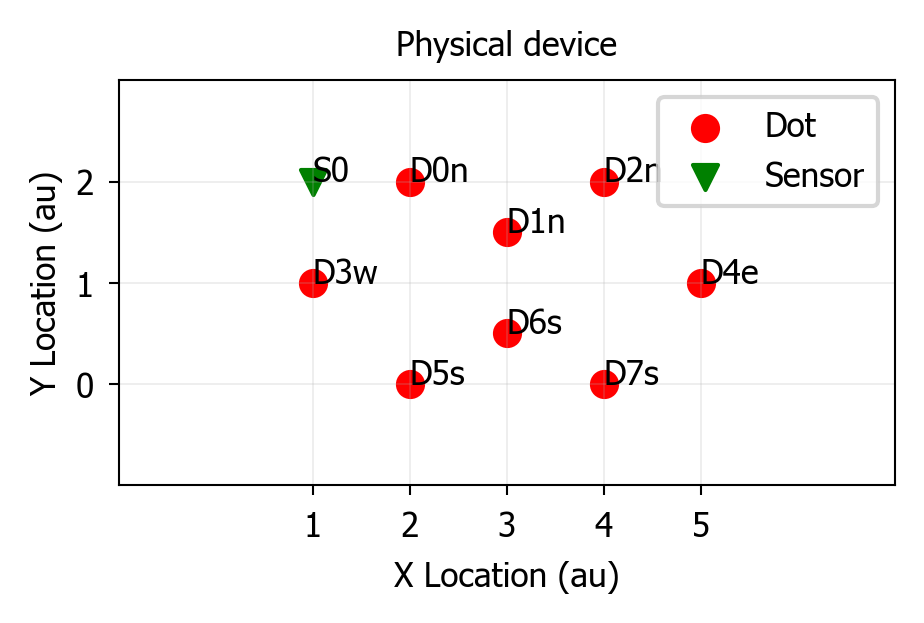

In [3]:
# Create a QDDevice object
qddevice = QDDevice()

# Set the custom locations of the quantum dots, here we chose 8 quantum dots
qddevice.set_custom_dot_locations([[2, 2], [3, 1.5], [4, 2], [1, 1], [5, 1], [2, 0], [3, 0.5], [4, 0]])

# Set the custom mutual capacitance matrix between the quantum dots and the gates
# Check that the indexing of the gates and dots is consistent in the matrix
dot_gate_matrix = np.array([
    #  n,    w,    e,    s  Gates
    [0.14, 0.00, 0.00, 0.00], # D0n  (dots)
    [0.14, 0.00, 0.00, 0.00], # D1n
    [0.14, 0.00, 0.00, 0.00], # D2n
    [0.00, 0.13, 0.00, 0.00], # D3w
    [0.00, 0.00, 0.12, 0.00], # D4e
    [0.00, 0.00, 0.00, 0.15], # D5s
    [0.00, 0.00, 0.00, 0.15], # D6s
    [0.00, 0.00, 0.00, 0.15]  # D7s
])

# Set the custom mutual capacitance matrix between the quantum dots and the gates
qddevice.set_dot_gate_mutual_capacitance_matrix(dot_gate_matrix)

# Print the device information
qddevice.print_device_info()

# Set the sensors coordinates and labels
sensor_locations = [[1,2]]
sensor_labels = ['S0']

# Plot the device
qddevice.plot_device(sensor_locations=sensor_locations, sensor_labels=sensor_labels, custom_dot_labels=['D0n', 'D1n', 'D2n', 'D3w','D4e', 'D5s', 'D6s', 'D7s'],save_plot_to_filepath='../results/figures/custom_device.pdf') # plot the device and save the plot to a file

## 3. Simulation setup and plots

2024-03-27 12:14:54,737	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
100%|██████████| 1/1 [00:00<00:00, 30.63it/s]


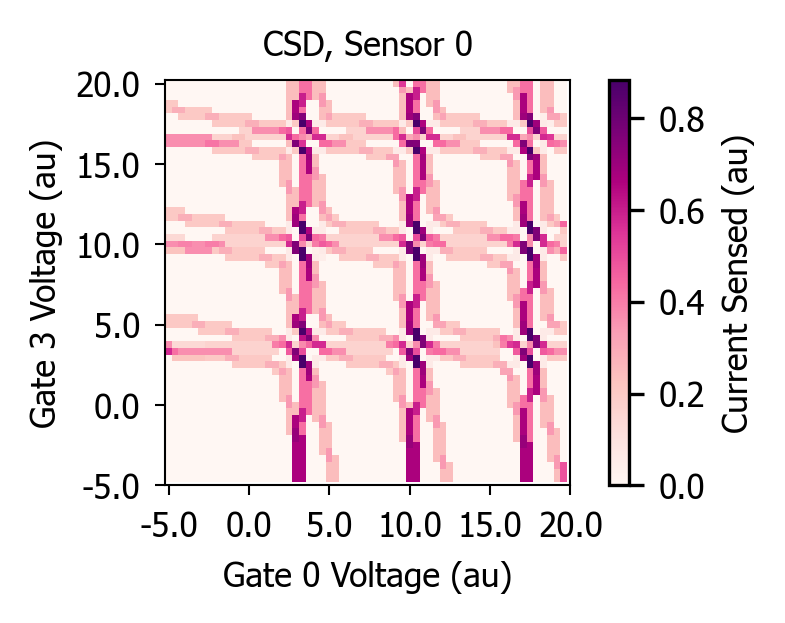

In [9]:
# Create a QDSimulator object
qdsimulator = QDSimulator(simulate='Electrons')

# Set the sensor locations
qdsimulator.set_sensor_locations(sensor_locations)

# Simulate the charge stability diagram
qdsimulator.simulate_charge_stability_diagram(qd_device=qddevice, solver='MOSEK', v_range_x=[-5, 20], v_range_y=[-5, 20], n_points_per_axis=60, scanning_gate_indexes=[0, 3], use_ray=True)

# Plot the charge stability diagram
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu', plot_potential=False)
